# OCR for images: We have received images of 2000 files and the file is in our drive, We have done OCR to convert our image to text, since our dataset is large, we are just uploading text dataset into notebook. Code for Converting images to text is given below:


In [ ]:
#mounting drive for loading dataset
# Google colab version
'''from google.colab import drive
import os

drive.mount('/content/drive')
path = '/content/drive/My Drive/tx-pub-cover-dataset' '''

"from google.colab import drive\nimport os\n\ndrive.mount('/content/drive')\npath = '/content/drive/My Drive/tx-pub-cover-dataset' "

In [ ]:
# 
# from PIL import Image
# import pytesseract
# import numpy as np
# import cv2
# import pandas as pd
# import os
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# df=pd.DataFrame(columns=['text','group','classification'])
# for dir_name in os.listdir( r'C:\Users\hp\Downloads\tx-pub-cover-dataset\data'):
#     p=r+"/"+dir_name
#     g=dir_name
#     if("_" in dir_name):
#         g=dir_name.split("_")[0][0]
#     elif("-" in dir_name):
#         g=dir_name.split("-")[0]
#     else:
#         g=dir_name
#     for j in os.listdir(p):
#         img1 = np.array(cv2.imread(p+'/'+j))
#         text = pytesseract.image_to_string(img1)
#         df.loc[len(df.index)]=[text,g,dir_name]
# df.to_csv('dataset_1.csv')'''

# Data cleaning and build Model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_1.csv to dataset_1 (1).csv


In [ ]:

from __future__ import division
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from collections import Counter
from codecs import open
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score,\
    confusion_matrix,\
    precision_score,\
    recall_score,\
    f1_score, \
    classification_report
from sklearn.svm import SVC
import numpy as np
import string
import matplotlib.pyplot as plt
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preprocessing


In [ ]:
df1 = pd.read_csv("dataset_1.csv")

In [ ]:
df1

,Unnamed: 0,text,group,classification
0,0,1S\n\nfoe\n\ngle\n\nPe ~~\n\n:\ngee\n“hs\n\nSi...,books,books
1,1,"-“TheChicanoWorker\n\nVernon M. Briggs, Jr., W...",books,books
2,2,Ta So\n\n3925 ISR RREZeEeS\n\nMeritt titifliit...,books,books
3,3,A TEXAS LEGACY\n~ THE OLD SAN ANTONIO ROAD\nAN...,books,books
4,4,SIXTH EDITION\n\n,books,books
...,...,...,...,...
2025,2025,NaN,s,s_tx-travel
2026,2026,NaN,s,s_tx-travel
2027,2027,A QUARTERLY PUBLICATION\nOF THE TEXAS DEPARTME...,s,s_wingtips
2028,2028,A QUARTERLY PUBLICATION\nOF THE TEXAS DEPARTME...,s,s_wingtips


Removing White Space

In [ ]:

df2=df1['text'].str.strip()

Removing Null Values

In [ ]:

df2 = df1.dropna()


Removing Punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df2['text'] = df2['text'].apply(remove_punctuation)
df2.head(10)

,Unnamed: 0,text,group,classification
0,0,1S\n\nfoe\n\ngle\n\nPe \n\n\ngee\n“hs\n\nSie a...,books,books
1,1,“TheChicanoWorker\n\nVernon M Briggs Jr Walter...,books,books
2,2,Ta So\n\n3925 ISR RREZeEeS\n\nMeritt titifliit...,books,books
3,3,A TEXAS LEGACY\n THE OLD SAN ANTONIO ROAD\nAND...,books,books
4,4,SIXTH EDITION\n\n,books,books
5,5,Text Photo\n\nphy by Bill Wright\n\nUNIVERSIT...,books,books
6,6,TEXAS AM UNIVER\n\n\n\n\n\nAN ANTONIO\n\nHE J...,books,books
7,7,Fiscal Year\n2020\n\n,b,b_agency
8,8,‘TEXAS COMMISSION ON ENVIRONMENTAL QUALITY \n...,b,b_agency
9,9,TEXAS FACILITIES COMMISSION\nOperating Budget\...,b,b_agency


Removing Stopwords

In [ ]:
df2['clean_title'] = df2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

making lowercase

In [ ]:
df2['clean_title']=df2['clean_title'].str.lower()

In [ ]:
df2['clean_title']

0       1s foe gle pe gee “hs sie sean seat ae ot texa...
1       “thechicanoworker vernon m briggs jr walter fo...
2       ta so 3925 isr rrezeees meritt titifliitt tt z...
3       a texas legacy the old san antonio road and th...
4                                           sixth edition
                              ...                        
2021                                    portunities arise
2022                pl rm wh sali eet ty ae bs iis si inc
2027    a quarterly publication of the texas departmen...
2028    a quarterly publication of the texas departmen...
2029    a quarterly publication of the texas departmen...
Name: clean_title, Length: 1973, dtype: object

# Checking the documents label

In [ ]:
doc_label=df2["group"].value_counts()
doc_label

r              538
s              472
o              231
b              216
m              210
misc            96
l               75
county          42
h               24
books           21
directories     18
jury            18
p               12
Name: group, dtype: int64

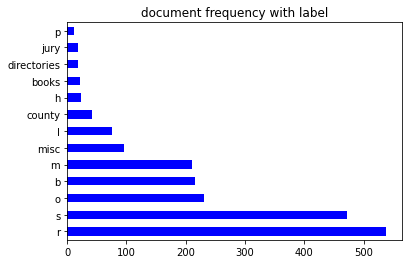

In [ ]:
doc_label.plot.barh(x='frequency', y='group', title='document frequency with label', color='blue')

In [ ]:
##Checking number of documents in each category
pd.set_option('display.max_rows', None)

df2["classification"].value_counts()



r_an-fin-agency     113
r_inmate            112
b_UT                102
misc                 96
s_tx-lib             93
m_tpwd               78
s_ems                71
m_tx-bk              66
o_ers-summer         54
r_misc               51
b_bud-edu-ut         51
l_laws               48
county-inventory     36
s_ems-m              29
r_an-fin-school      25
r_ar-agency          25
o_ers-new-em         24
s_tpw                23
r_sunset             22
books                21
s_tx-highways        21
s_echo               21
directories          18
o_cu-rules           18
b_school             18
o_lbb-summary-h      18
jury                 18
s_tn                 17
o_lbb-summary-s      17
s_ers-connection     16
r_sac-dec            16
m_tabc               15
r_sac-staff          15
b_agency             15
o_ers-fall           15
b_lar-gov            15
l_books              15
r_sac-fin            14
r_afr-gov            14
o_public-utility     14
s_stardate           13
s_ttr           

In [ ]:
## Checking total number of label in our data
df2["classification"].nunique()

144

['b_UT', 'b_agency', 'b_bud-edu', 'b_bud-edu-ut', 'b_bud-gov', 'b_lar-gov', 'b_school', 'books', 'county-archive', 'county-inventory', 'directories', 'h_tbom', 'h_tcm', 'h_tfm', 'h_tgm', 'h_tlm', 'h_trefm', 'jury', 'l_books', 'l_jury', 'l_laws', 'l_re-forms', 'm_catalog', 'm_edu', 'm_ers', 'm_lbb', 'm_tabc', 'm_tceq-spa', 'm_tlc', 'm_tpwd', 'm_tpwd-spa', 'm_tx-bk', 'misc', 'o_cu-rules', 'o_ers-fall', 'o_ers-new-em', 'o_ers-new-em-spa', 'o_ers-summer', 'o_lbb-district', 'o_lbb-summary', 'o_lbb-summary-h', 'o_lbb-summary-s', 'o_leg', 'o_manuals', 'o_plan', 'o_public-utility', 'o_tbom', 'o_tceq', 'o_tceq-rg', 'o_tcm', 'o_tlc-summary', 'o_twi-briefing', 'o_tx-bar-bk', 'p_hear', 'p_misc', 'p_tcotx', 'r_afr-edu', 'r_afr-gov', 'r_an-fin-agency', 'r_an-fin-school', 'r_ar-agency', 'r_ar-gov', 'r_ar-nf-agency', 'r_ar-school', 'r_arn-gov', 'r_clean', 'r_comp', 'r_consult-study', 'r_f-stat', 'r_i86', 'r_i87', 'r_inmate', 'r_interim', 'r_mds', 'r_misc', 'r_ref', 'r_sac-dec', 'r_sac-fin', 'r_sac-mis

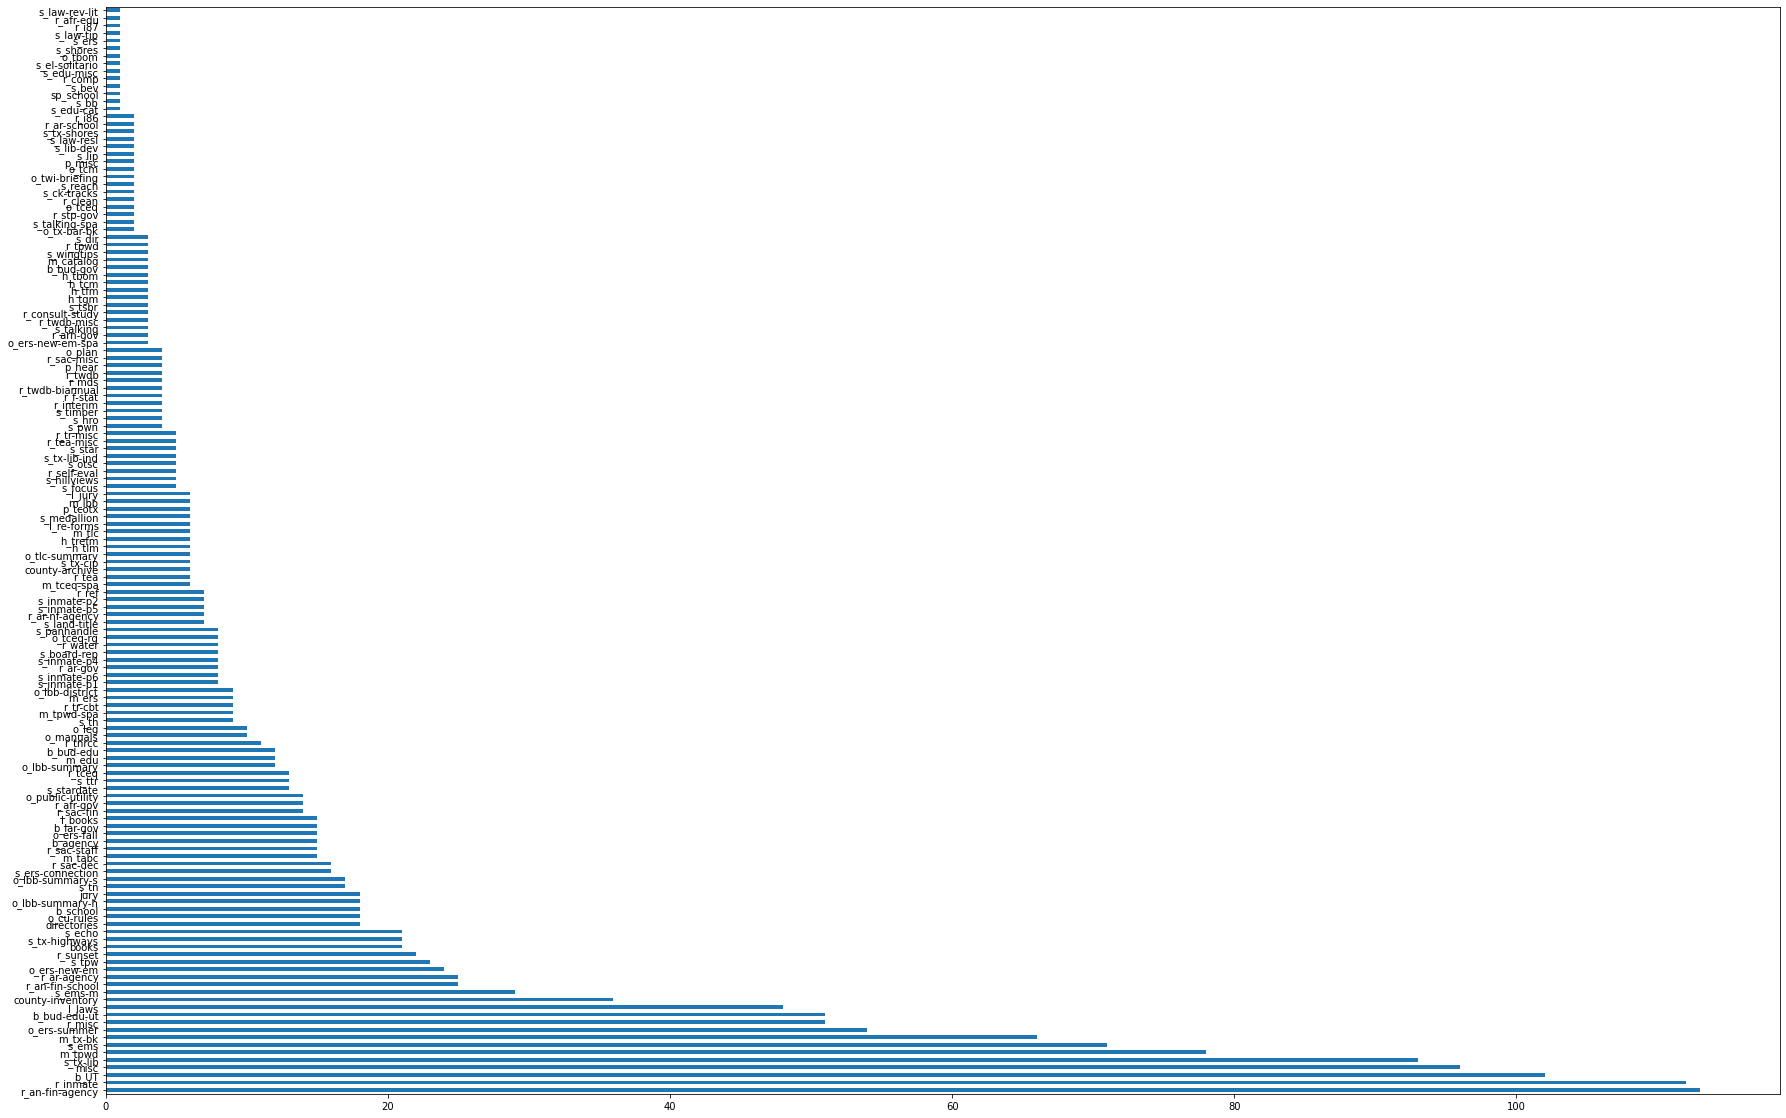

In [ ]:
import matplotlib.pyplot as plt
labels = list(df2.classification.unique())
labels.sort()
print(labels)
plt.figure(figsize=(30,20))
df2.classification.value_counts().plot(kind='barh')
plt.show()

# Spiliting into training and test set

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
doc_df=df2[['clean_title', 'group']]

In [ ]:
train, test = train_test_split(doc_df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X = doc_df.clean_title
print(X.shape)

    
y = doc_df.group
print(y.shape)

(1973,)
(1973,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1321,)
(652,)
(1321,)
(652,)


Investigating Training and Test data

In [ ]:
train_label_counter=y_train.nunique() 
print(train_label_counter)
test_label_counter=y_test.nunique() 
print(test_label_counter)




13
13


In [ ]:
train_label=y_train.value_counts()
a=train_label.head(10)

In [ ]:
test_label=y_test.value_counts()
b=test_label.head(10)

In [ ]:
train_test_label_comparison = pd.concat([a, b],axis = 1)

In [ ]:
train_test_label_comparison

,group,group
r,365.0,173.0
s,313.0,159.0
o,147.0,84.0
b,146.0,70.0
m,135.0,75.0
misc,72.0,24.0
l,50.0,25.0
county,32.0,10.0
h,17.0,NaN
directories,15.0,NaN


In [ ]:
train_test_label_comparison.reset_index(inplace=True)
train_test_label_comparison = train_test_label_comparison.rename(columns = {'index':'group_name'})

In [ ]:
train_test_label_comparison


,group_name,group,group
0,r,365.0,173.0
1,s,313.0,159.0
2,o,147.0,84.0
3,b,146.0,70.0
4,m,135.0,75.0
5,misc,72.0,24.0
6,l,50.0,25.0
7,county,32.0,10.0
8,h,17.0,NaN
9,directories,15.0,NaN


In [ ]:
df = train_test_label_comparison[:].values
df

array([['r', 365.0, 173.0],
       ['s', 313.0, 159.0],
       ['o', 147.0, 84.0],
       ['b', 146.0, 70.0],
       ['m', 135.0, 75.0],
       ['misc', 72.0, 24.0],
       ['l', 50.0, 25.0],
       ['county', 32.0, 10.0],
       ['h', 17.0, nan],
       ['directories', 15.0, nan],
       ['jury', nan, 11.0],
       ['books', nan, 10.0]], dtype=object)

In [ ]:
train_test_label_comparison.columns = ["group_name", "training_group_label", "test_group_label"]

In [ ]:
train_test_label_comparison

,group_name,training_group_label,test_group_label
0,r,365.0,173.0
1,s,313.0,159.0
2,o,147.0,84.0
3,b,146.0,70.0
4,m,135.0,75.0
5,misc,72.0,24.0
6,l,50.0,25.0
7,county,32.0,10.0
8,h,17.0,NaN
9,directories,15.0,NaN


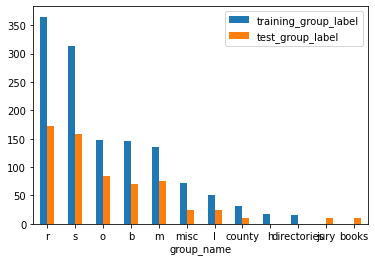

In [ ]:
ax = train_test_label_comparison .plot(x="group_name", y=["training_group_label", "test_group_label"], kind="bar", rot=0)

# Applying Base line/Dummy Classifier

In [ ]:
strategies = ['most_frequent', 'stratified', 'uniform']
  
test_scores = []
for s in strategies:
    # if s =='constant':
    #     dclf = DummyClassifier(strategy = s, random_state = 0)
    # else:
    dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    test_scores.append(score)
print(test_scores)

[0.26533742331288346, 0.1656441717791411, 0.06441717791411043]


# Experimnet 1: Since our titles contain multilangual like combination of English+Spanish-- We kept our data that way. And conducted Experiment 1. Later we will conduct experiment 2:Convert Spanish Title into English 3: Just keeping the English Title Experimnet 

# Applying countvectorizer and Building a List of vocabularies

In [ ]:
#transform a given text into a vector on the basis of the frequency (count)
vectorized_training = CountVectorizer().fit(X_train)
#Creating Dictionary with vocabulary
vectorized_training.vocabulary_

{'extension': 5375,
 'loan': 7937,
 'library': 7833,
 'sity': 11636,
 'of': 9056,
 'uunivers': 13209,
 'texas': 12497,
 'aust': 2205,
 'tin': 12647,
 'tey': 12514,
 'ps': 10200,
 'proposal': 10158,
 'for': 5715,
 'the': 12531,
 'establishment': 5191,
 'state': 11949,
 'medical': 8277,
 'college': 3386,
 'in': 6854,
 'dallas': 3986,
 'condensed': 3532,
 'analyses': 1791,
 'proposed': 10160,
 'constitutional': 3607,
 'amendments': 1766,
 'november': 8932,
 '2015': 560,
 'election': 4841,
 'legislative': 7763,
 'council': 3775,
 'quarterly': 10300,
 'publication': 10221,
 'department': 4174,
 'transportation': 12837,
 'aviation': 2248,
 'division': 4458,
 'sey': 11443,
 'ia': 6698,
 'bs': 2752,
 'ite': 7258,
 'mina': 8425,
 'es': 5150,
 'twtintiten': 12980,
 'eneseega': 4982,
 'feed': 5513,
 'gugreruloenge': 6209,
 'heneeeioe': 6408,
 'ih': 6762,
 'eee': 4746,
 'ey': 5391,
 'ntl': 8954,
 'wii': 13651,
 'ae': 1557,
 'je': 7326,
 'eet': 4772,
 'secretin': 11251,
 'sce': 11168,
 'eae': 4644,

In [ ]:
training_vector = vectorized_training.transform(X_train)
print(training_vector)

  (0, 2205)	1
  (0, 3386)	1
  (0, 3986)	1
  (0, 5191)	1
  (0, 5375)	1
  (0, 5715)	1
  (0, 6854)	1
  (0, 7833)	1
  (0, 7937)	1
  (0, 8277)	1
  (0, 9056)	2
  (0, 10158)	1
  (0, 10200)	1
  (0, 11636)	1
  (0, 11949)	1
  (0, 12497)	1
  (0, 12514)	1
  (0, 12531)	1
  (0, 12647)	1
  (0, 13209)	1
  (1, 560)	1
  (1, 1766)	1
  (1, 1791)	1
  (1, 3532)	1
  (1, 3607)	1
  :	:
  (1320, 3297)	1
  (1320, 3433)	1
  (1320, 3582)	1
  (1320, 5056)	1
  (1320, 5866)	1
  (1320, 5868)	1
  (1320, 6133)	1
  (1320, 7195)	1
  (1320, 7311)	1
  (1320, 8126)	1
  (1320, 8858)	1
  (1320, 8892)	1
  (1320, 9164)	1
  (1320, 9275)	1
  (1320, 9832)	1
  (1320, 10171)	1
  (1320, 10187)	1
  (1320, 10301)	1
  (1320, 10670)	1
  (1320, 11253)	1
  (1320, 11453)	1
  (1320, 11732)	1
  (1320, 11789)	1
  (1320, 12497)	2
  (1320, 13507)	2


In [ ]:
vectorized_eval = CountVectorizer(vocabulary=vectorized_training.vocabulary_).fit(X_test)
vectorized_eval.vocabulary_

{'extension': 5375,
 'loan': 7937,
 'library': 7833,
 'sity': 11636,
 'of': 9056,
 'uunivers': 13209,
 'texas': 12497,
 'aust': 2205,
 'tin': 12647,
 'tey': 12514,
 'ps': 10200,
 'proposal': 10158,
 'for': 5715,
 'the': 12531,
 'establishment': 5191,
 'state': 11949,
 'medical': 8277,
 'college': 3386,
 'in': 6854,
 'dallas': 3986,
 'condensed': 3532,
 'analyses': 1791,
 'proposed': 10160,
 'constitutional': 3607,
 'amendments': 1766,
 'november': 8932,
 '2015': 560,
 'election': 4841,
 'legislative': 7763,
 'council': 3775,
 'quarterly': 10300,
 'publication': 10221,
 'department': 4174,
 'transportation': 12837,
 'aviation': 2248,
 'division': 4458,
 'sey': 11443,
 'ia': 6698,
 'bs': 2752,
 'ite': 7258,
 'mina': 8425,
 'es': 5150,
 'twtintiten': 12980,
 'eneseega': 4982,
 'feed': 5513,
 'gugreruloenge': 6209,
 'heneeeioe': 6408,
 'ih': 6762,
 'eee': 4746,
 'ey': 5391,
 'ntl': 8954,
 'wii': 13651,
 'ae': 1557,
 'je': 7326,
 'eet': 4772,
 'secretin': 11251,
 'sce': 11168,
 'eae': 4644,

In [ ]:
eval_vector = vectorized_eval.transform(X_test)

In [ ]:
X_eval = eval_vector.toarray()
print(X_eval)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tfidf_transformer_eval = TfidfTransformer().fit(eval_vector)
print(tfidf_transformer_eval)

TfidfTransformer()


In [ ]:
tfidf_transformer_training = TfidfTransformer().fit(training_vector)
significance_training = tfidf_transformer_training.transform(training_vector)

In [ ]:
significance_eval = tfidf_transformer_eval.transform(eval_vector)

In [ ]:
#training and building the classifier
nbclf = MultinomialNB().fit(significance_training,y_train)

In [ ]:
nbclf_predictions = nbclf.predict(significance_eval)
print(nbclf_predictions)

['r' 'o' 'r' 'b' 'r' 'r' 'b' 'r' 'b' 'r' 'county' 'r' 'r' 'o' 'r' 's' 'r'
 'r' 's' 's' 'm' 'r' 'r' 's' 'r' 'b' 'm' 's' 'b' 'b' 'r' 'r' 'o' 'm' 'm'
 's' 's' 's' 's' 'r' 'r' 's' 'r' 'o' 's' 'r' 'o' 's' 'r' 'r' 'r' 's' 'r'
 'r' 'b' 'm' 's' 'o' 's' 'm' 's' 's' 'm' 'o' 'm' 'b' 'r' 'r' 'b' 'r' 'o'
 's' 'r' 'r' 'r' 'o' 'r' 'r' 'm' 'r' 's' 'r' 's' 's' 'r' 'r' 'b' 'r' 's'
 'r' 'misc' 'o' 'r' 'r' 'o' 's' 'r' 's' 'r' 'm' 'r' 'b' 's' 'b' 's' 's'
 's' 's' 'o' 'b' 's' 's' 'o' 'r' 's' 'r' 'r' 'r' 'r' 's' 'r' 'r' 'o' 'r'
 'm' 'r' 'o' 'misc' 'm' 's' 'r' 'o' 'r' 'r' 'm' 'r' 'o' 'r' 'r' 'm' 'r'
 'r' 'o' 's' 'r' 'o' 'r' 's' 'b' 'r' 'm' 'm' 's' 'r' 'r' 's' 'r' 's' 'r'
 'b' 'r' 'r' 's' 'r' 's' 's' 's' 'o' 'r' 's' 'r' 's' 'r' 'r' 'r' 'r' 'r'
 'r' 'm' 's' 'r' 'b' 'r' 'b' 'o' 'county' 's' 'r' 's' 'r' 'r' 'o' 'r' 'r'
 's' 's' 'r' 'h' 'r' 's' 'r' 'r' 'r' 'r' 'b' 'o' 'm' 'o' 'r' 'r' 'r' 's'
 'r' 'r' 'b' 'm' 's' 'r' 's' 's' 'r' 'b' 'b' 'r' 'm' 's' 'm' 's' 's' 'r'
 'r' 'r' 'r' 'r' 'b' 'r' 'b' 'b' 'r' 'o' 'r' 'r' 'r

# Measuring Performnace of the model

In [ ]:
nb_accuracy_score = accuracy_score(y_test, nbclf_predictions)

In [ ]:
print(nb_accuracy_score)
E1ANB = nb_accuracy_score

0.745398773006135


In [ ]:
# PRECISION SCORE
# MICRO = Calculate metrics globally by counting the total true positives, false negatives and false positives.
nb_precision_score = precision_score(y_test, nbclf_predictions, average="micro")

In [ ]:
print(nb_precision_score)


0.745398773006135


In [ ]:
e1pre = nb_precision_score

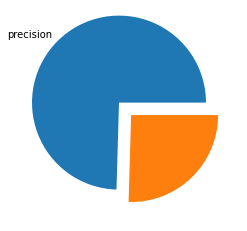

In [ ]:
e1y = np.array([nb_precision_score,1-nb_precision_score])
mylabels = ["precision",""]
myexplode = [0.2, 0]

plt.pie(e1y, labels = mylabels, explode = myexplode)
plt.show() 

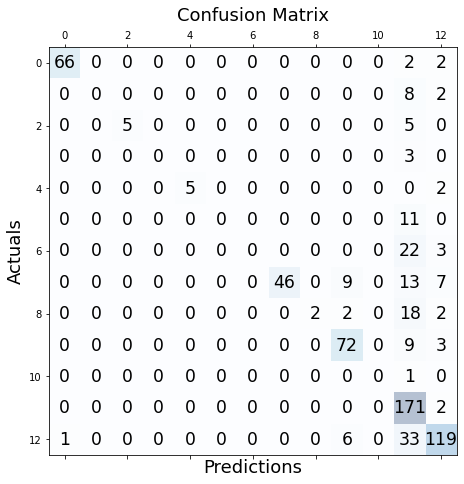

In [ ]:

# Get the predictions
#
y_pred= nbclf_predictions
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Applying Cross K=5 Folds Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(MultinomialNB(),training_vector,y_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.81132075 0.78030303 0.70075758 0.73106061 0.79924242]
0.7645368782161235


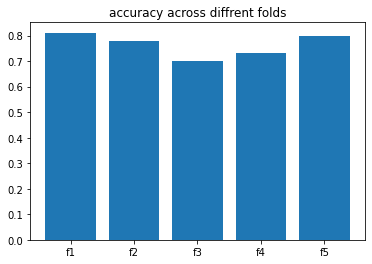

In [ ]:
e1b=['f1','f2','f3','f4','f5']
plt.bar(e1b,scores)
plt.title('accuracy across diffrent folds')
plt.show()

# Preparing Classification Report

We kept the following error beacuse our some of the test data did not have any training data

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = y_pred
y_test = y_test

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.98507463 0.         1.         0.         1.         0.
 0.         1.         1.         0.80898876 0.         0.5777027
 0.83802817]
recall: [0.94285714 0.         0.5        0.         0.71428571 0.
 0.         0.61333333 0.08333333 0.85714286 0.         0.98843931
 0.74842767]
fscore: [0.96350365 0.         0.66666667 0.         0.83333333 0.
 0.         0.76033058 0.15384615 0.83236994 0.         0.72921109
 0.79069767]


We issue this problem here

In [ ]:
print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           b       0.99      0.94      0.96        70
      county       1.00      0.50      0.67        10
           h       1.00      0.71      0.83         7
           m       1.00      0.61      0.76        75
        misc       1.00      0.08      0.15        24
           o       0.81      0.86      0.83        84
           r       0.58      0.99      0.73       173
           s       0.84      0.75      0.79       159

   micro avg       0.75      0.81      0.78       602
   macro avg       0.90      0.68      0.72       602
weighted avg       0.81      0.81      0.77       602



# Random Forest

In [ ]:
# importing random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(significance_training,y_train)

RandomForestClassifier()

In [ ]:
pred = clf.predict(significance_eval)

In [ ]:
nb_accuracy_score = accuracy_score(y_test, pred)
nb_accuracy_score
E1ARF=nb_accuracy_score

In [ ]:
# PRECISION SCORE
# MICRO = Calculate metrics globally by counting the total true positives, false negatives and false positives.
nb_precision_score = precision_score(y_test, pred, average="micro")
nb_precision_score 
e2pre = nb_precision_score

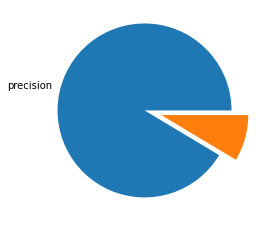

In [ ]:
e1y = np.array([nb_precision_score,1-nb_precision_score])
mylabels = ["precision",""]
myexplode = [0.2, 0]

plt.pie(e1y, labels = mylabels, explode = myexplode)
plt.show() 

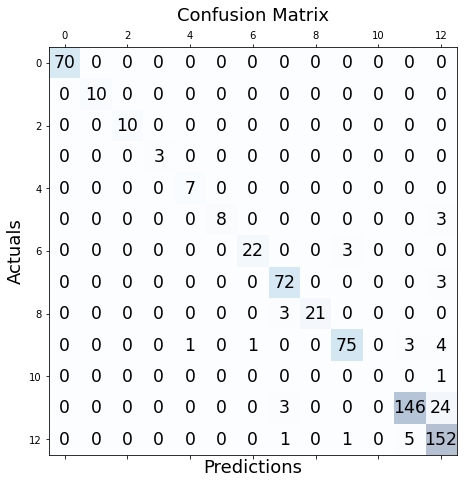

In [ ]:
# Get the predictions
#
y_pred= pred
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,training_vector,y_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.9245283  0.90530303 0.875      0.88257576 0.92045455]
0.9015723270440251


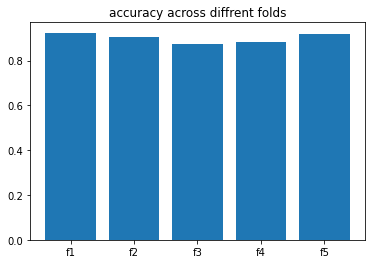

In [ ]:
e1b=['f1','f2','f3','f4','f5']
plt.bar(e1b,scores)
plt.title('accuracy across diffrent folds')
plt.show()

# 2nd Experiment: By translating Spanish Title into English 


In [ ]:
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator
translator = Translator()
df1['text'] = df1['text'].apply(lambda x: translator.translate(x, dest='en').text)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df3=df1
df3=df3.dropna(axis=0)
df3['text'] = df3['text'].apply(remove_punctuation)
df3['clean_title'] = df3['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df3['clean_title']=df3['clean_title'].str.lower()
df3['clean_title']=df3['clean_title'].str.strip()

In [ ]:
doc_label2=df3["group"].value_counts()
doc_label2

r              547
s              491
o              233
m              219
b              216
misc           105
l               75
county          48
h               24
books           21
directories     21
jury            18
p               12
Name: group, dtype: int64

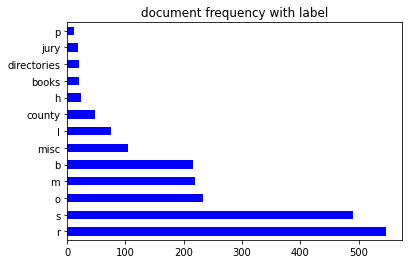

In [ ]:
doc_label2.plot.barh(x='frequency', y='group', title='document frequency with label', color='blue')

In [ ]:
doc_df2=df3[['clean_title', 'group']]

In [ ]:
X2 = doc_df2.clean_title
print(X.shape)

    
y2 = doc_df2.group
print(y.shape)

(1973,)
(1973,)


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(1624,)
(406,)
(1624,)
(406,)


In [ ]:
#transform a given text into a vector on the basis of the frequency (count)
vectorized_training = CountVectorizer().fit(X2_train)
#Creating Dictionary with vocabulary
vectorized_training.vocabulary_

{'texas': 12615,
 'department': 4230,
 'februarymarch': 5520,
 '1991': 538,
 '2017': 600,
 'summer': 12285,
 'enrollment': 5042,
 'former': 5765,
 'elected': 4866,
 'officials': 9128,
 'legislative': 7818,
 'employees': 4940,
 'board': 2686,
 'members': 8371,
 'the': 12656,
 'state': 12064,
 'offers': 9118,
 'valuable': 13360,
 'benefits': 2544,
 'package': 9443,
 'help': 6408,
 'protect': 10208,
 'health': 6371,
 'secure': 11378,
 'future': 5890,
 'you': 14090,
 'chance': 3220,
 'make': 8178,
 'changes': 3225,
 'ers': 5160,
 'dretirement': 4597,
 'system': 12397,
 'even': 5262,
 'don': 4535,
 'think': 12687,
 'want': 13607,
 'sure': 12329,
 'read': 10467,
 'booklet': 2720,
 'learn': 7784,
 'options': 9271,
 'plan': 9821,
 'year': 14068,
 '2018': 603,
 'responsible': 10815,
 'understanding': 13189,
 'work': 13869,
 'decisions': 4134,
 'may': 8291,
 'affect': 1671,
 'pay': 9589,
 'care': 3007,
 'what': 13739,
 'dates': 4076,
 'june': 7543,
 '26july': 791,
 '28': 805,
 'qftmmtm': 10317,


In [ ]:
training_vector = vectorized_training.transform(X2_train)
print(training_vector)

  (0, 538)	1
  (0, 4230)	1
  (0, 5520)	1
  (0, 12615)	1
  (1, 198)	3
  (1, 600)	3
  (1, 603)	2
  (1, 791)	1
  (1, 805)	1
  (1, 888)	1
  (1, 1198)	1
  (1, 1299)	1
  (1, 1487)	1
  (1, 1571)	4
  (1, 1671)	1
  (1, 1818)	2
  (1, 1821)	1
  (1, 1826)	1
  (1, 1866)	1
  (1, 1896)	1
  (1, 2025)	2
  (1, 2276)	1
  (1, 2543)	2
  (1, 2544)	6
  (1, 2618)	1
  :	:
  (1622, 12294)	1
  (1622, 12510)	1
  (1622, 12615)	1
  (1622, 13828)	1
  (1623, 608)	1
  (1623, 851)	1
  (1623, 1609)	1
  (1623, 1938)	1
  (1623, 2276)	1
  (1623, 4991)	1
  (1623, 5628)	1
  (1623, 5729)	1
  (1623, 6043)	1
  (1623, 6782)	1
  (1623, 6800)	1
  (1623, 9037)	1
  (1623, 10733)	1
  (1623, 12064)	1
  (1623, 12397)	2
  (1623, 12615)	1
  (1623, 12656)	1
  (1623, 13149)	1
  (1623, 13231)	1
  (1623, 13469)	1
  (1623, 14068)	1


In [ ]:
vectorized_eval = CountVectorizer(vocabulary=vectorized_training.vocabulary_).fit(X2_test)
vectorized_eval.vocabulary_

{'texas': 12615,
 'department': 4230,
 'februarymarch': 5520,
 '1991': 538,
 '2017': 600,
 'summer': 12285,
 'enrollment': 5042,
 'former': 5765,
 'elected': 4866,
 'officials': 9128,
 'legislative': 7818,
 'employees': 4940,
 'board': 2686,
 'members': 8371,
 'the': 12656,
 'state': 12064,
 'offers': 9118,
 'valuable': 13360,
 'benefits': 2544,
 'package': 9443,
 'help': 6408,
 'protect': 10208,
 'health': 6371,
 'secure': 11378,
 'future': 5890,
 'you': 14090,
 'chance': 3220,
 'make': 8178,
 'changes': 3225,
 'ers': 5160,
 'dretirement': 4597,
 'system': 12397,
 'even': 5262,
 'don': 4535,
 'think': 12687,
 'want': 13607,
 'sure': 12329,
 'read': 10467,
 'booklet': 2720,
 'learn': 7784,
 'options': 9271,
 'plan': 9821,
 'year': 14068,
 '2018': 603,
 'responsible': 10815,
 'understanding': 13189,
 'work': 13869,
 'decisions': 4134,
 'may': 8291,
 'affect': 1671,
 'pay': 9589,
 'care': 3007,
 'what': 13739,
 'dates': 4076,
 'june': 7543,
 '26july': 791,
 '28': 805,
 'qftmmtm': 10317,


In [ ]:
eval_vector = vectorized_eval.transform(X2_test)

In [ ]:
X_eval = eval_vector.toarray()
print(X_eval)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tfidf_transformer_eval = TfidfTransformer().fit(eval_vector)
print(tfidf_transformer_eval)

TfidfTransformer()


In [ ]:
tfidf_transformer_training = TfidfTransformer().fit(training_vector)
significance_training = tfidf_transformer_training.transform(training_vector)

In [ ]:
significance_eval = tfidf_transformer_eval.transform(eval_vector)

In [ ]:
#training and building the classifier
nbclf2 = MultinomialNB().fit(significance_training,y2_train)

In [ ]:
nbclf_predictions2 = nbclf2.predict(significance_eval)
print(nbclf_predictions2)

['r' 's' 'm' 's' 'r' 'r' 'r' 'b' 's' 'r' 's' 'o' 'r' 'b' 's' 's' 'r' 'r'
 'r' 'r' 'o' 'o' 'b' 'r' 'b' 'o' 'r' 's' 'r' 'r' 'r' 's' 'r' 'r' 'b' 's'
 'b' 'r' 's' 'o' 'b' 'r' 's' 'o' 'r' 's' 'o' 'm' 'r' 'r' 'o' 'b' 'r' 'r'
 'b' 'o' 'r' 'r' 's' 'b' 'r' 'r' 'm' 'r' 'b' 'r' 'r' 's' 's' 'r' 'o' 'b'
 'r' 'r' 'r' 'r' 'r' 'm' 'o' 'r' 'r' 'r' 'r' 'o' 'r' 'b' 'r' 's' 's' 'm'
 'b' 's' 's' 'r' 's' 'r' 's' 'r' 'r' 's' 'r' 'r' 'r' 'm' 'o' 'r' 'r' 'r'
 'r' 's' 'm' 's' 'r' 's' 's' 'county' 'r' 'r' 'r' 'r' 's' 'm' 'l' 'r' 'o'
 'm' 'r' 'r' 'r' 'r' 'r' 's' 's' 'r' 'r' 's' 's' 's' 'r' 'm' 'r' 'm' 'o'
 's' 'r' 'r' 'o' 'r' 'r' 'b' 'r' 'r' 'r' 'o' 'b' 'o' 'r' 's' 'o' 'r' 's'
 's' 'r' 'r' 'r' 'r' 'o' 'r' 'o' 'o' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'h' 'b' 'b' 's' 's' 'r' 'm' 'r' 'r' 'b' 's' 'o' 'r' 'o' 'r' 'r' 'm' 'r'
 'r' 'b' 's' 'o' 'o' 'o' 'r' 'm' 's' 'o' 'r' 'r' 'r' 'o' 's' 'r' 'r' 'b'
 'o' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'm' 'r' 'o' 'r' 'r' 'r' 'm' 'b' 's'
 'b' 'b' 'm' 'r' 'r' 's' 'b' 'o' 'r' 'o' 'm' 'r' '

In [ ]:
nb_accuracy_score2 = accuracy_score(y2_test, nbclf_predictions2)

In [ ]:
print(nb_accuracy_score2)
e3pre = nb_accuracy_score2
E2ANB = nb_accuracy_score2

0.6970443349753694


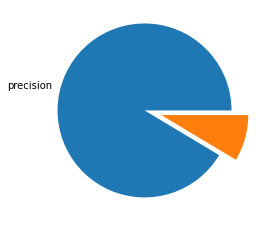

In [ ]:
e1y = np.array([nb_precision_score,1-nb_precision_score])
mylabels = ["precision",""]
myexplode = [0.2, 0]

plt.pie(e1y, labels = mylabels, explode = myexplode)
plt.show() 

# Random Forest

In [ ]:
clf = RandomForestClassifier()
clf.fit(significance_training,y2_train)

RandomForestClassifier()

In [ ]:
pred = clf.predict(significance_eval)

In [ ]:
nb_accuracy_score = accuracy_score(y2_test, pred)
nb_accuracy_score
E2ARF = nb_accuracy_score

In [ ]:
# PRECISION SCORE
# MICRO = Calculate metrics globally by counting the total true positives, false negatives and false positives.
nb_precision_score = precision_score(y2_test, pred, average="micro")
nb_precision_score 
e4pre = nb_precision_score 

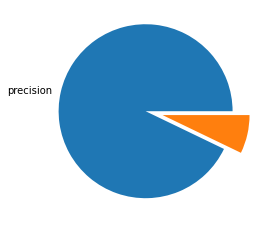

In [ ]:
e1y = np.array([nb_precision_score,1-nb_precision_score])
mylabels = ["precision",""]
myexplode = [0.2, 0]

plt.pie(e1y, labels = mylabels, explode = myexplode)
plt.show() 

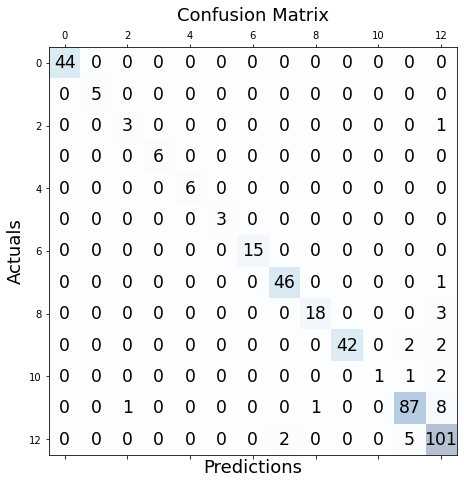

In [ ]:
# Get the predictions
#
y_pred= pred
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y2_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,training_vector,y2_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.90153846 0.92       0.91692308 0.92307692 0.91666667]
0.9156410256410258


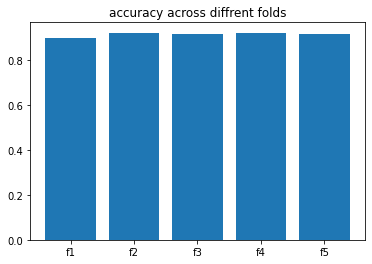

In [ ]:
e1b=['f1','f2','f3','f4','f5']
plt.bar(e1b,scores)
plt.title('accuracy across diffrent folds')
plt.show()

#3rd Experiment

In [ ]:
#loading dataset
df=pd.read_csv('dataset_1.csv')

In [ ]:
#droping NA
df=df.dropna()

In [ ]:
#droping classification column
df=df.drop(['classification'],axis=1)

In [ ]:
# removing numbers
l=list()
a=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','\t',' ','\n']
for i in df['text']:
    k=i.lower()
    for j in k:
        if(j not in a):
            l.append(j)



In [ ]:
#doing tokenization,eliminating new line charachters and eliminating empty strings
shwa=list()
for index,row in df.iterrows():
    p=""
    k=row[1].lower()
    for j in k:
        if(j not in l):
            p+=j
    p=p.replace('\n',' ')
    z=p.split(' ')
    #print(z)
    z.remove('')
    y=list(filter(('').__ne__, z))
    shwa.append([y,row[2]])
    

In [ ]:
#removing stop words in spanish and in english
shwa1=[]
stop_words = stopwords.words('english')
stop_words +=stopwords.words('spanish')
for x,y in shwa:
    l=list()
    for i in x:
        if i not in stop_words:
            l.append(i)
    shwa1.append([l,y])

In [ ]:
!pip install language_detector
from language_detector import detect_language
nltk.download('words')
from nltk.corpus import words
#detcting english words
import language_detector
english_words = []
for x, y in shwa1:
    l=list()
    for i in x:
        if(i in words.words() and detect_language(i)=='English'):
            l.append(i)
    print(y)
    english_words.append([l,y])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


books
books
books
books
books
books
books
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
county
county
county
county
county
county
county
county
county
county
county
county
county
county
directories
directories
directories
directories
directories
directories
h
h
h
h
h
h
h
h
jury
jury
jury
jury
jury
jury
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
misc
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
m
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
books
books
books
books
books
books
books
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b
b


In [ ]:
#forming dataset
rp = pd.DataFrame(columns=['words','targets'])
for x, y in english_words:
  p=''
  for i in x:
    p=p+i+' '
  rp.loc[len(rp.index)]=[p,y]

In [ ]:
#droping duplicates
rp = rp.drop_duplicates()

In [ ]:
#train_test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(rp,test_size=0.2, random_state=42)

In [ ]:
x_train = train['words']
y_train =train['targets']
x_test =test['words']
y_test =test['targets']

In [ ]:
vectorized_training = CountVectorizer().fit(x_train)
vectorized_training.vocabulary_

{'foreword': 1160,
 'ting': 2571,
 'doc': 810,
 'ait': 82,
 'free': 1202,
 'within': 2876,
 'dawn': 698,
 'youth': 2922,
 'root': 2197,
 'childhood': 395,
 'walter': 2767,
 'echo': 850,
 'staff': 2337,
 'found': 1185,
 'self': 2245,
 'sitting': 2292,
 'cold': 440,
 'courtroom': 650,
 'town': 2621,
 'saw': 2218,
 'wearing': 2797,
 'didnt': 765,
 'founder': 1187,
 'father': 1032,
 'hero': 1317,
 'valedictorian': 2710,
 'city': 410,
 'wide': 2844,
 'first': 1104,
 'pacific': 1884,
 'railroad': 2047,
 'life': 1557,
 'forever': 1159,
 'everyone': 957,
 'story': 2386,
 'continued': 586,
 'personality': 1925,
 'residential': 2141,
 'contractor': 592,
 'construction': 566,
 'path': 1905,
 'wield': 2848,
 'sawdust': 2219,
 'dont': 830,
 'let': 1551,
 'anyone': 123,
 'tell': 2491,
 'otherwise': 1863,
 'network': 1750,
 'television': 2489,
 'owner': 1881,
 'partner': 1897,
 'school': 2224,
 'district': 806,
 'technical': 2473,
 'education': 861,
 'brought': 315,
 'encourage': 902,
 'actually': 36

In [ ]:
training_vector = vectorized_training.transform(x_train)
print(training_vector)

  (0, 1160)	1
  (0, 2571)	1
  (1, 2)	1
  (1, 14)	1
  (1, 15)	2
  (1, 36)	1
  (1, 41)	1
  (1, 56)	1
  (1, 60)	1
  (1, 82)	1
  (1, 103)	1
  (1, 110)	1
  (1, 123)	1
  (1, 142)	1
  (1, 156)	1
  (1, 211)	1
  (1, 214)	1
  (1, 234)	1
  (1, 275)	1
  (1, 291)	1
  (1, 315)	2
  (1, 347)	1
  (1, 357)	1
  (1, 365)	2
  (1, 395)	1
  :	:
  (871, 554)	1
  (871, 570)	1
  (871, 695)	2
  (871, 783)	2
  (871, 973)	1
  (871, 1092)	1
  (871, 1104)	1
  (871, 1274)	1
  (871, 1278)	1
  (871, 1346)	1
  (871, 1398)	1
  (871, 1546)	1
  (871, 1621)	1
  (871, 1768)	2
  (871, 2133)	4
  (871, 2349)	3
  (871, 2398)	1
  (871, 2743)	1
  (872, 1809)	1
  (872, 1824)	1
  (873, 2496)	1
  (873, 2655)	1
  (874, 53)	1
  (874, 733)	1
  (874, 1309)	1


In [133]:
vectorized_eval = CountVectorizer(vocabulary=vectorized_training.vocabulary_).fit(x_test)
vectorized_eval.vocabulary_

{'foreword': 1160,
 'ting': 2571,
 'doc': 810,
 'ait': 82,
 'free': 1202,
 'within': 2876,
 'dawn': 698,
 'youth': 2922,
 'root': 2197,
 'childhood': 395,
 'walter': 2767,
 'echo': 850,
 'staff': 2337,
 'found': 1185,
 'self': 2245,
 'sitting': 2292,
 'cold': 440,
 'courtroom': 650,
 'town': 2621,
 'saw': 2218,
 'wearing': 2797,
 'didnt': 765,
 'founder': 1187,
 'father': 1032,
 'hero': 1317,
 'valedictorian': 2710,
 'city': 410,
 'wide': 2844,
 'first': 1104,
 'pacific': 1884,
 'railroad': 2047,
 'life': 1557,
 'forever': 1159,
 'everyone': 957,
 'story': 2386,
 'continued': 586,
 'personality': 1925,
 'residential': 2141,
 'contractor': 592,
 'construction': 566,
 'path': 1905,
 'wield': 2848,
 'sawdust': 2219,
 'dont': 830,
 'let': 1551,
 'anyone': 123,
 'tell': 2491,
 'otherwise': 1863,
 'network': 1750,
 'television': 2489,
 'owner': 1881,
 'partner': 1897,
 'school': 2224,
 'district': 806,
 'technical': 2473,
 'education': 861,
 'brought': 315,
 'encourage': 902,
 'actually': 36

In [132]:
eval_vector = vectorized_eval.transform(x_test)

In [134]:
tfidf_transformer_eval = TfidfTransformer().fit(eval_vector)
print(tfidf_transformer_eval)

TfidfTransformer()


In [135]:
tfidf_transformer_training = TfidfTransformer().fit(training_vector)
significance_training = tfidf_transformer_training.transform(training_vector)

In [136]:
significance_eval = tfidf_transformer_eval.transform(eval_vector)

In [137]:
# training multinomial_naive_baise
nbclf = MultinomialNB().fit(significance_training,y_train)

In [138]:
nbclf_predictions = nbclf.predict(significance_eval)
print(nbclf_predictions)

['r' 'r' 'r' 's' 'r' 's' 'r' 'r' 's' 'r' 'r' 's' 's' 'r' 'r' 's' 'r' 'r'
 'r' 'r' 's' 'o' 'r' 'r' 'o' 'r' 'r' 'r' 'r' 'r' 'r' 's' 's' 's' 'r' 'r'
 'r' 's' 'r' 's' 's' 's' 'r' 's' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 's' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 's'
 's' 'r' 'r' 'r' 'r' 'r' 'r' 's' 's' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 's' 'r' 'r' 's' 'r' 's' 'r' 'r' 's' 'r' 'r' 'r' 'r' 'r' 'r' 'o'
 'r' 'r' 's' 'r' 'o' 's' 'r' 'o' 'r' 's' 'r' 's' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 's' 's' 'r' 's' 'r' 'r' 's' 'r' 'r' 'r' 's' 'r' 's' 'r' 's'
 's' 'r' 'r' 'r' 's' 'r' 'r' 'r' 'r' 'r' 's' 'r' 'r' 'r' 'r' 's' 'r' 'r'
 's' 'r' 's' 'r' 'r' 's' 's' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 's' 'r' 's' 'r'
 'r' 'r' 's' 'r' 'r' 's' 'r' 'r' 'r' 'o' 'o' 'r' 'r' 'r' 'r' 's' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'o' 'r' 'r' 'r' 'r' 'r' 's' 'r' 'r' 'r' 'r'
 'r' 's' 'r']


In [157]:
nb_accuracy_score = accuracy_score(y_test, nbclf_predictions)

In [158]:
nb_accuracy_score
E3ANB = nb_accuracy_score

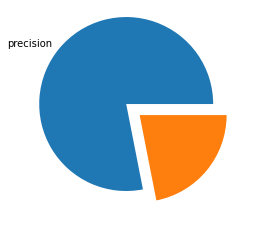

In [159]:

e1y = np.array([nb_precision_score,1-nb_precision_score])
mylabels = ["precision",""]
myexplode = [0.2, 0]

plt.pie(e1y, labels = mylabels, explode = myexplode)
plt.show()

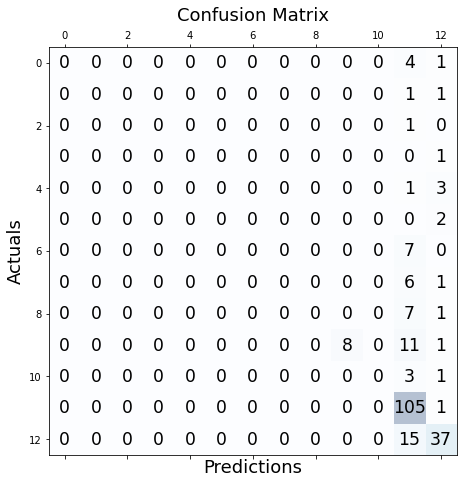

In [142]:
# Get the predictions
#
y_pred= nbclf_predictions
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [143]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(MultinomialNB(),training_vector,y_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.68       0.65142857 0.69142857 0.69142857 0.72      ]
0.6868571428571428


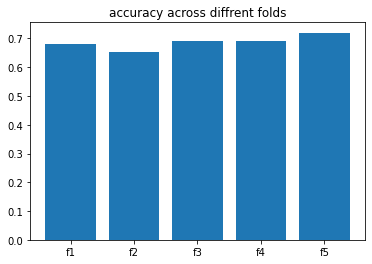

In [144]:
e1b=['f1','f2','f3','f4','f5']
plt.bar(e1b,scores)
plt.title('accuracy across diffrent folds')
plt.show()

In [160]:
# PRECISION SCORE
# MICRO = Calculate metrics globally by counting the total true positives, false negatives and false positives.
nb_precision_score = precision_score(y_test, nbclf_predictions, average="micro")
nb_precision_score
e5pre =nb_precision_score

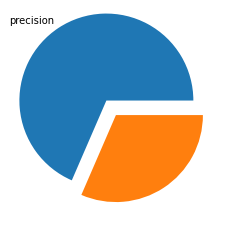

In [161]:
e1y = np.array([nb_precision_score,1-nb_precision_score])
mylabels = ["precision",""]
myexplode = [0.2, 0]

plt.pie(e1y, labels = mylabels, explode = myexplode)
plt.show()

# Random Forest

In [147]:
# importing random forest
from sklearn.ensemble import RandomForestClassifier

In [148]:
clf = RandomForestClassifier()
clf.fit(significance_training,y_train)

RandomForestClassifier()

In [149]:
pred = clf.predict(significance_eval)

In [163]:
nb_accuracy_score_1 = accuracy_score(y_test, pred)
nb_accuracy_score_1 
E3ARF = nb_accuracy_score_1

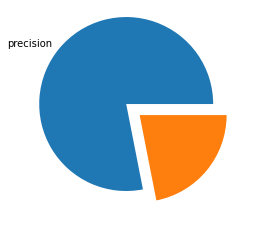

In [165]:
e1y = np.array([nb_accuracy_score_1,1-nb_accuracy_score_1])
mylabels = ["precision",""]
myexplode = [0.2, 0]

plt.pie(e1y, labels = mylabels, explode = myexplode)
plt.show()

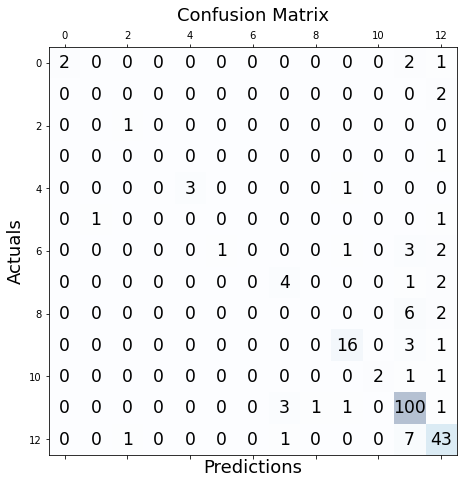

In [152]:
# Get the predictions
#
y_pred= pred
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [153]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,training_vector,y_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.78285714 0.77714286 0.80571429 0.78857143 0.74285714]
0.7794285714285715


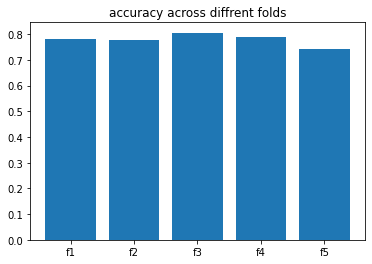

In [154]:
e1b=['f1','f2','f3','f4','f5']
plt.bar(e1b,scores)
plt.title('accuracy across diffrent folds')
plt.show()

In [155]:
# PRECISION SCORE
# MICRO = Calculate metrics globally by counting the total true positives, false negatives and false positives.
nb_precision_score = precision_score(y_test, pred, average="micro")
nb_precision_score
e6pre =nb_precision_score

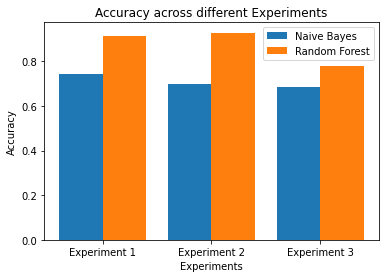

In [156]:
X = ['Experiment 1','Experiment 2','Experiment 3']
YNB = [E1ANB,E2ANB,E3ANB]
ZRF = [E1ARF,E2ARF,E3ARF]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, YNB, 0.4, label = 'Naive Bayes')
plt.bar(X_axis + 0.2, ZRF, 0.4, label = 'Random Forest')
  
plt.xticks(X_axis, X)
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
plt.title("Accuracy across different Experiments")
plt.legend()
plt.show()